In [1]:
import pandas as pd
import os
import numpy as np
import seaborn
from glob import glob
from datetime import datetime


In [2]:
data = pd.read_csv('data/cleaned-vehicles-2020-10-28-2020-12-03.csv')
data.head()


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,state,lat,long,posting_date,posting_year,car_age
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02 08:11:30-06:00,2020.0,10.0
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02 02:11:50-06:00,2020.0,6.0
2,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.8616,-85.2161,2020-12-01 15:54:45-06:00,2020.0,46.0
3,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.5475,-85.4682,2020-12-01 12:53:56-06:00,2020.0,15.0
4,5,7239776805,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2016.0,toyota,tacoma double cab sr5,good,...,pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01 07:27:25-06:00,2020.0,4.0


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Convert to DataFrame
df1 = pd.DataFrame(data)
df = df1.sample(frac=0.2, random_state=42)

# Define features and target
X = df.drop(columns=["price","url","region_url","image_url","lat","long","description"])
y = df["price"]

# Use pandas' automatic handling of categoricals
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)





In [4]:
from sklearn.metrics import mean_absolute_error, r2_score
# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)  # R-squared

# Combine actual and predicted values for analysis
test_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_test
})
print(test_results)

      Actual  Predicted
0      25999   22399.91
1        995    4095.38
2      25995   31972.08
3       5995    5654.33
4       5995    6591.43
...      ...        ...
9554    3000    3474.81
9555   29999   42615.83
9556   32990   32906.00
9557    6499    5250.28
9558   36695   32364.42

[9559 rows x 2 columns]


C:\Users\arturtam\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
differences = test_results["Actual"] - test_results["Predicted"]

# Add as a DataFrame for better representation
differences_df = pd.DataFrame({
    "Actual": test_results["Actual"],
    "Predicted": test_results["Predicted"],
    "Difference": differences
})
print(differences_df)

      Actual  Predicted  Difference
0      25999   22399.91     3599.09
1        995    4095.38    -3100.38
2      25995   31972.08    -5977.08
3       5995    5654.33      340.67
4       5995    6591.43     -596.43
...      ...        ...         ...
9554    3000    3474.81     -474.81
9555   29999   42615.83   -12616.83
9556   32990   32906.00       84.00
9557    6499    5250.28     1248.72
9558   36695   32364.42     4330.58

[9559 rows x 3 columns]


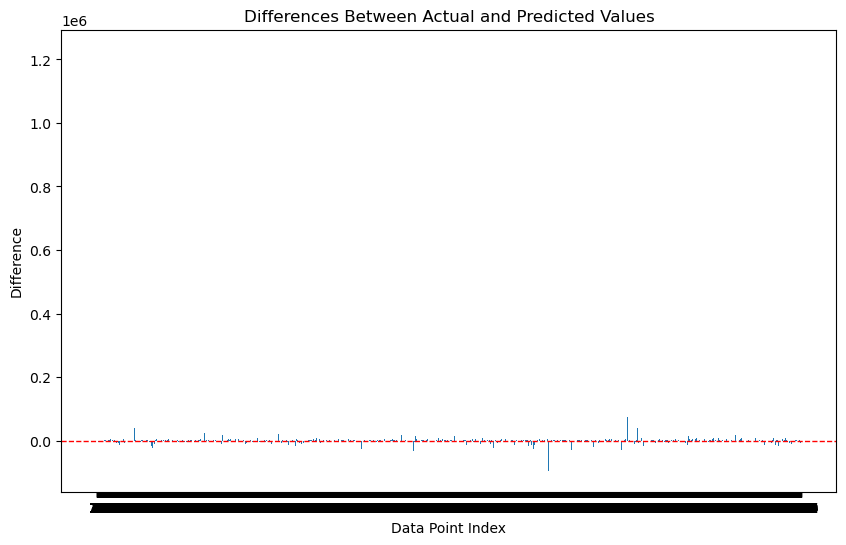

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(differences)), differences, tick_label=range(1, len(differences) + 1))
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Differences Between Actual and Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Difference')
plt.show(300)

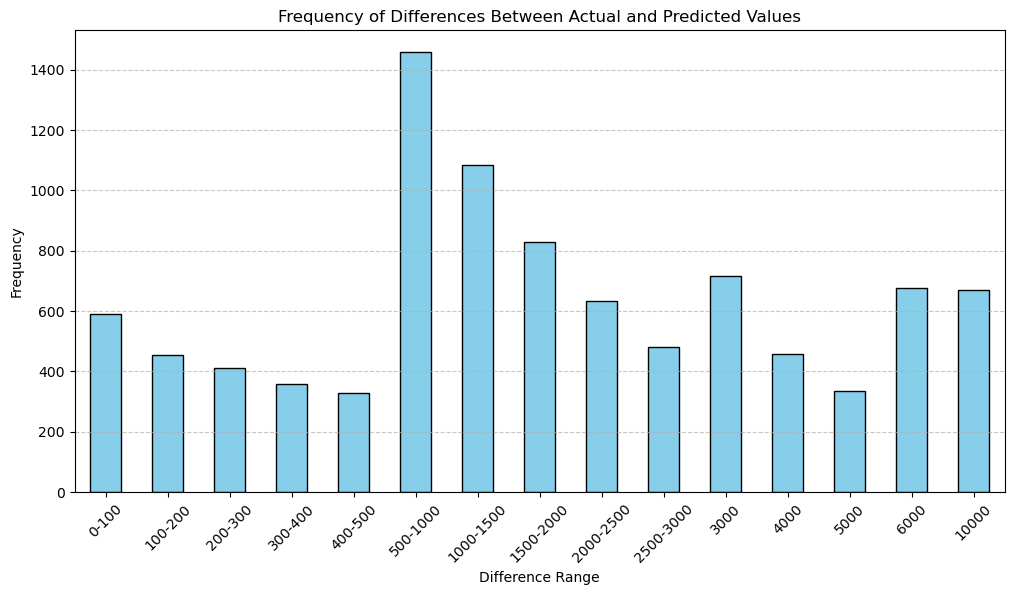

In [7]:
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000,4000,5000,6000,10000, np.inf]
labels = [
    "0-100", "100-200", "200-300", "300-400", "400-500", 
    "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", "3000","4000","5000","6000","10000"
]
# Categorize differences into bins and count the occurrences
bin_counts = pd.cut(abs(differences), bins=bins, labels=labels).value_counts()

# Plot the distribution of differences
plt.figure(figsize=(12, 6))
bin_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Differences Between Actual and Predicted Values')
plt.xlabel('Difference Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


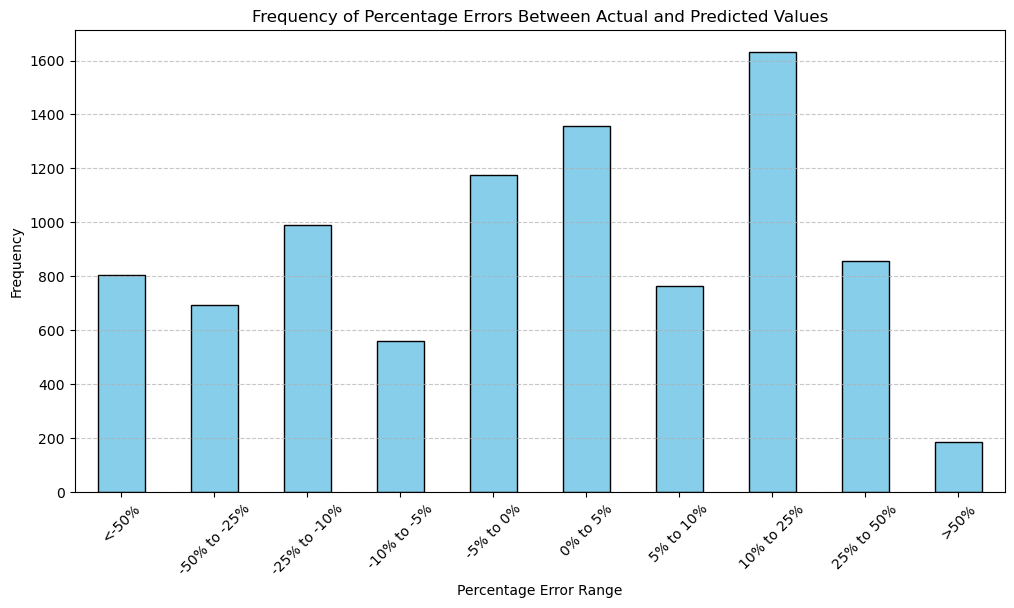

In [8]:
# Calculate percentage difference for each line
percentage_differences = (differences_df["Difference"] / differences_df["Actual"]) * 100

# Categorize percentage differences into bins
percentage_bins = [-np.inf, -50, -25, -10, -5, 0, 5, 10, 25, 50, np.inf]
percentage_labels = [
    "<-50%", "-50% to -25%", "-25% to -10%", "-10% to -5%",
    "-5% to 0%", "0% to 5%", "5% to 10%", "10% to 25%", 
    "25% to 50%", ">50%"
]

percentage_bin_counts = pd.cut(percentage_differences, bins=percentage_bins, labels=percentage_labels).value_counts()

# Display percentage bins and frequencies
percentage_bin_counts_df = pd.DataFrame({
    "Percentage Range": percentage_labels,
    "Frequency": percentage_bin_counts.sort_index().values
})

# Plot the percentage error ranges as a bar chart
plt.figure(figsize=(12, 6))
percentage_bin_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Percentage Errors Between Actual and Predicted Values')
plt.xlabel('Percentage Error Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

